In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset

In [2]:
file_path = 'framingham_heart_disease.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [96]:
print(df.shape)

(30, 14)


In [97]:
df.describe()

age        sex         cp    trestbps        chol        fbs  \
count  30.000000  30.000000  30.000000   30.000000   30.000000  30.000000   
mean   52.833333   0.766667   1.466667  136.400000  232.133333   0.166667   
std     8.594639   0.430183   1.166585   14.075168   38.690401   0.379049   
min    37.000000   0.000000   0.000000  110.000000  164.000000   0.000000   
25%    45.750000   1.000000   0.000000  130.000000  204.500000   0.000000   
50%    53.500000   1.000000   2.000000  140.000000  233.500000   0.000000   
75%    58.750000   1.000000   2.000000  143.750000  246.250000   0.000000   
max    71.000000   1.000000   3.000000  160.000000  354.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  30.000000   30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.633333  160.366667   0.266667   1.183333   1.533333   0.500000   
std     0.490133   17.391007   0.449776   1.361562   0.730297   0.900192   
min     0.000000  108.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000  150.500000   0.000000   0.075000   1.000000   0.000000   
50%     1.000000  163.000000   0.000000   0.900000   2.000000   0.000000   
75%     1.000000  174.250000   0.750000   1.500000   2.000000   1.000000   
max     1.000000  187.000000   1.000000   6.200000   2.000000   3.000000   

            thal  target  
count  30.000000    30.0  
mean    1.966667     1.0  
std     0.490133     0.0  
min     1.000000     1.0  
25%     2.000000     1.0  
50%     2.000000     1.0  
75%     2.000000     1.0  
max     3.000000     1.0

# Handle missing values

In [3]:
missing_values = data.isnull().sum()
missing_values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Handling Missing Values

In [6]:
# Impute missing values for numerical features with the median
numerical_features = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Impute missing values for categorical features with the mode
categorical_features = ['education', 'BPMeds']
for feature in categorical_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

C:\Users\admi\AppData\Local\Temp\ipykernel_19400\2863999822.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].median(), inplace=True)
C:\Users\admi\AppData\Local\Temp\ipykernel_19400\2863999822.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Encode categorical variables

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical variables
categorical_features = ['education']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


male       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1 -1.234951              0   -0.751322     0.0                0   
1     0 -0.418257              0   -0.751322     0.0                0   
2     1 -0.184916              1    0.929210     0.0                0   
3     0  1.331800              1    1.769476     0.0                0   
4     0 -0.418257              1    1.181289     0.0                0   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0             0         0 -0.940600 -1.195907 -1.082625  0.287379   0.342761   
1             0         0  0.300313 -0.515187 -0.158988  0.719752   1.590291   
2             0         0  0.187503 -0.220209 -0.242955 -0.113057  -0.073082   
3             1         0 -0.263739  0.800871  1.016549  0.682902  -0.904768   
4             0         0  1.089985 -0.106755  0.092912 -0.663350   0.758605   

    glucose  TenYearCHD  education_2.0  education_3.0  education_4.0  
0 -0.201359           0          False          False           True  
1 -0.245099           0           True          False          False  
2 -0.507537           0          False          False          False  
3  0.935872           1          False           True          False  
4  0.148558           0          False           True          False

# Scale numerical features

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the processed dataset
print(data.head())


   male       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1 -1.234951              0   -0.751322     0.0                0   
1     0 -0.418257              0   -0.751322     0.0                0   
2     1 -0.184916              1    0.929210     0.0                0   
3     0  1.331800              1    1.769476     0.0                0   
4     0 -0.418257              1    1.181289     0.0                0   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0             0         0 -0.940600 -1.195907 -1.082625  0.287379   0.342761   
1             0         0  0.300313 -0.515187 -0.158988  0.719752   1.590291   
2             0         0  0.187503 -0.220209 -0.242955 -0.113057  -0.073082   
3             1         0 -0.263739  0.800871  1.016549  0.682902  -0.904768   
4             0         0  1.089985 -0.106755  0.092912 -0.663350   0.758605   

    glucose  TenYearCHD  education_2.0  education_3.0  education_4.0  
0 -0.2013

# Perform basic exploratory data analysis

# and Visualization

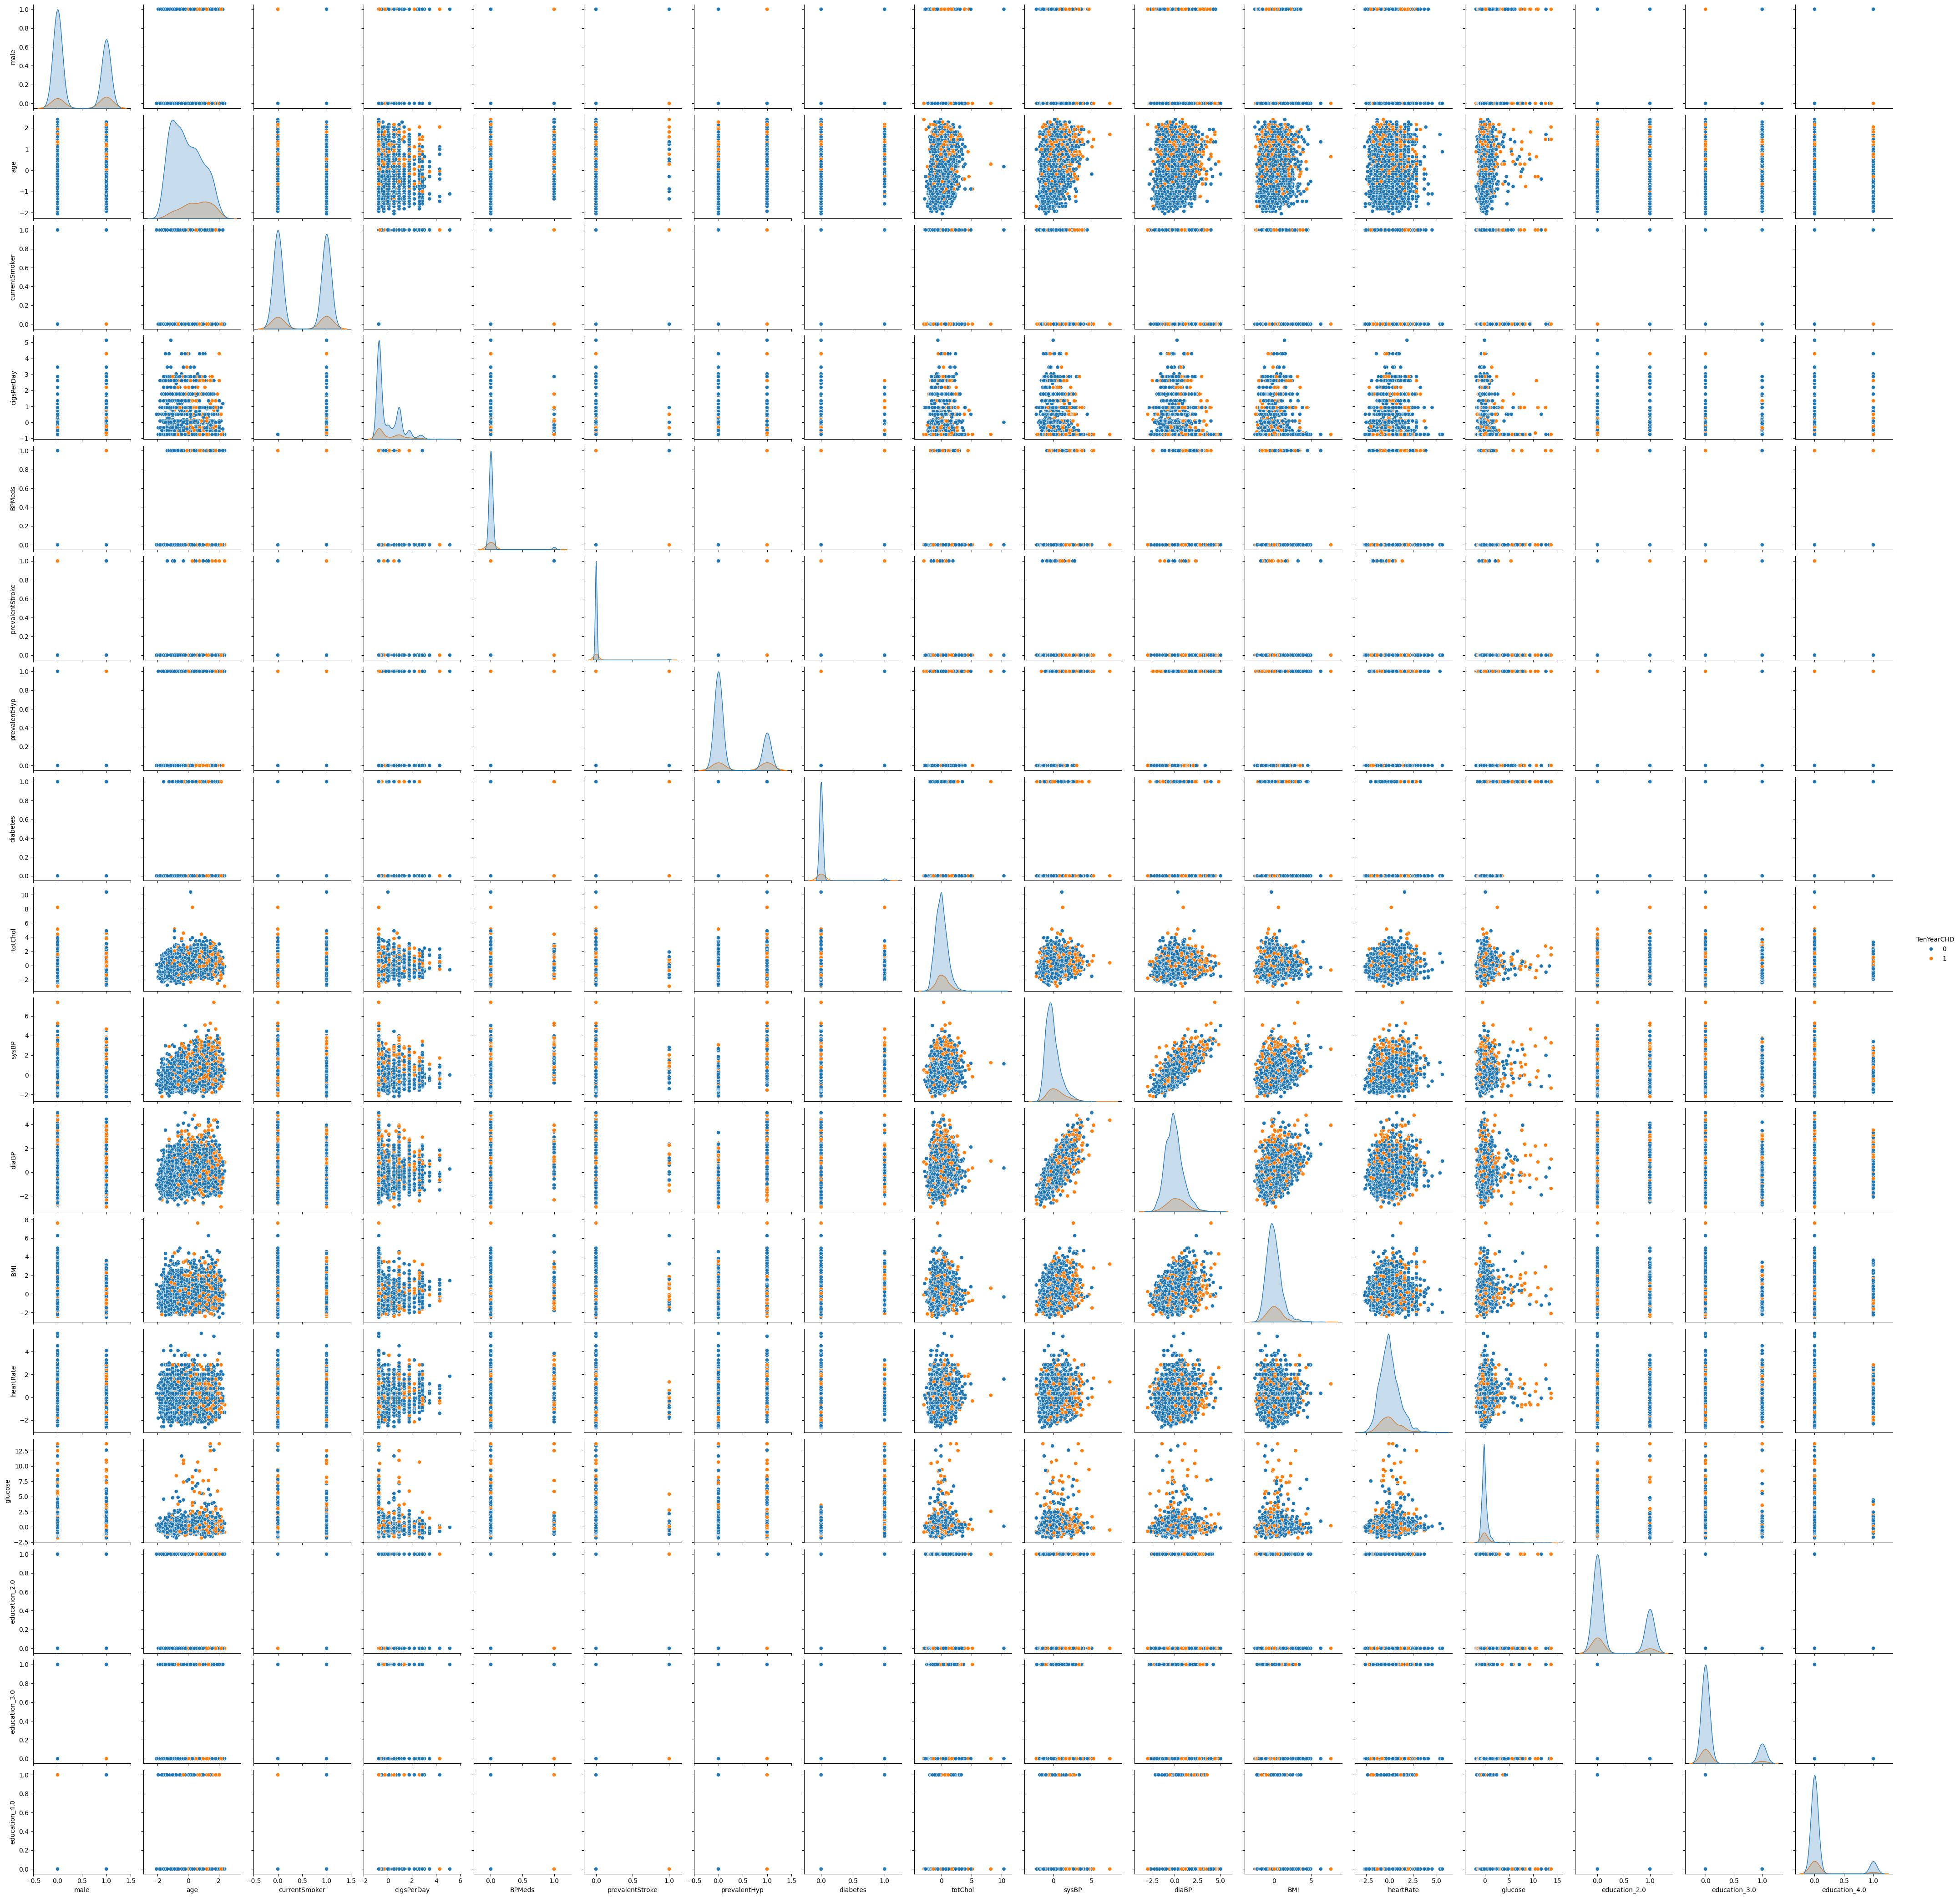

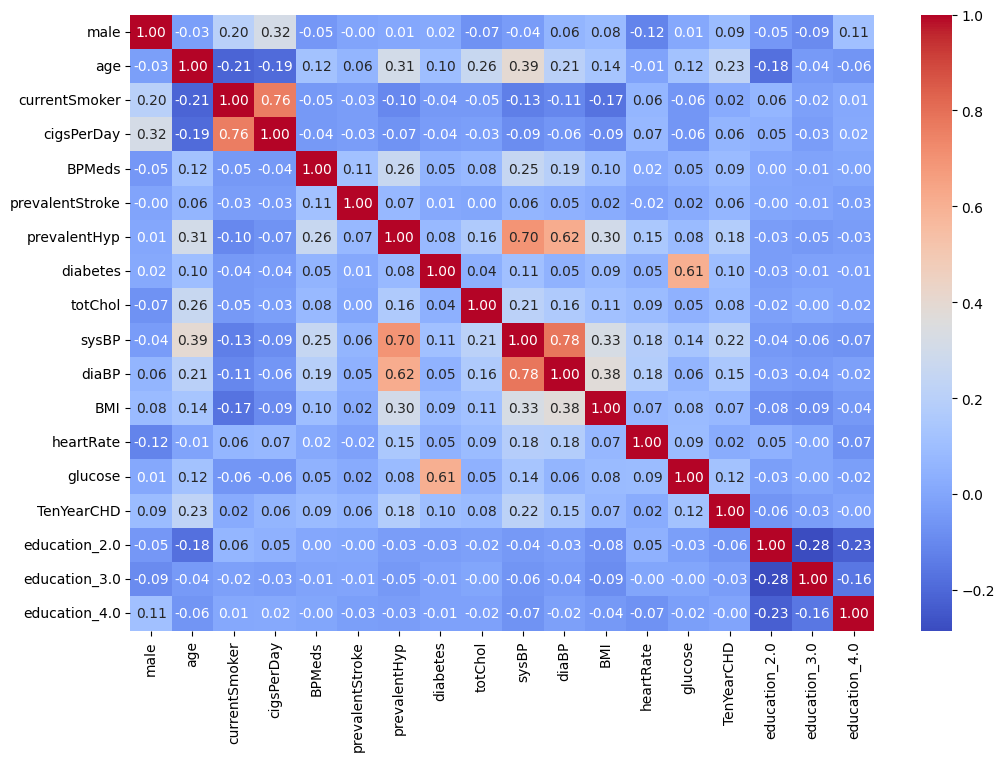

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for exploratory data analysis
sns.pairplot(data, hue='TenYearCHD')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


# Visualize correlations

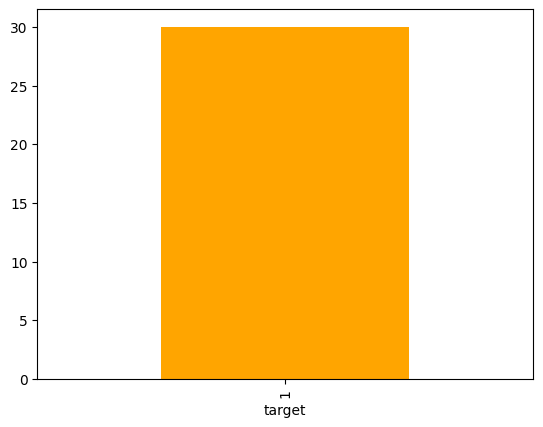

In [109]:
df["target"].value_counts().plot(kind="bar", color=["orange", "blue"]);

In [110]:
df.sex.value_counts()

sex
1    23
0     7
Name: count, dtype: int64

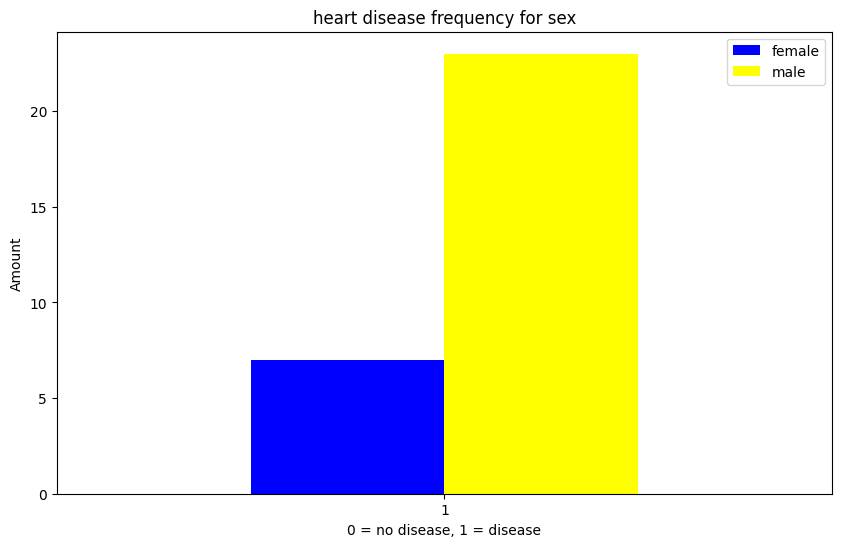

In [111]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["blue","yellow"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

# Split Data and Train Logistic Regression Model make predictions Evaluate the model and plot the ROC curve

Accuracy: 0.8596698113207547
Precision: 0.6666666666666666
Recall: 0.08064516129032258
F1 Score: 0.14388489208633093
ROC AUC: 0.7073271252896096


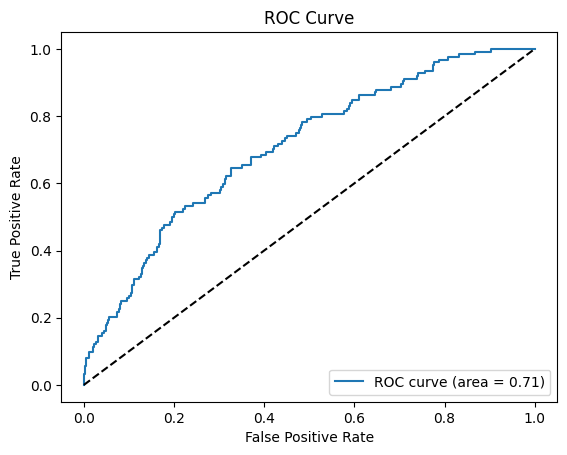

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Split the data into training and testing sets
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model with regularization
model = LogisticRegression(penalty='l2', solver='liblinear') # using L2 regularization
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Interpret the coefficients

In [13]:
import numpy as np

# Interpret the coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)

                 Coefficient  Odds Ratio
male                0.388673    1.475023
age                 0.559672    1.750098
currentSmoker      -0.060929    0.940890
cigsPerDay          0.298090    1.347283
BPMeds              0.243991    1.276332
prevalentStroke     0.761403    2.141279
prevalentHyp        0.181407    1.198903
diabetes            0.004212    1.004221
totChol             0.040610    1.041446
sysBP               0.309186    1.362316
diaBP               0.021180    1.021406
BMI                -0.026368    0.973976
heartRate          -0.061546    0.940310
glucose             0.188092    1.206944
education_2.0      -0.147846    0.862564
education_3.0      -0.026870    0.973488
education_4.0       0.177564    1.194304


# Calculate odds ratios